# Data Mining Project
### Giorgio Donati, g.donati24@studenti.unipi.it
### Pietro Francaviglia, p.francaviglia1@studenti.unipi.it
#### A.Y. 2021-2022


# Libraries and datasets

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from col_names import *
from utility import *

# Clustering

In [2]:
with open(f'{PICKLE_FOLDER}basket_prepared_df.pkl', 'rb') as f:
    b_df = pickle.load(f)
with open(f'{PICKLE_FOLDER}item_prepared_df.pkl', 'rb') as f:
    i_df = pickle.load(f)
with open(f'{PICKLE_FOLDER}user_prepared_df.pkl', 'rb') as f:
    u_df = pickle.load(f)
with open(f'{PICKLE_FOLDER}shop_prepared_df.pkl', 'rb') as f:
    s_df = pickle.load(f)
with open(f'{PICKLE_FOLDER}date_prepared_df.pkl', 'rb') as f:
    d_df = pickle.load(f)
with open(f'{PICKLE_FOLDER}total_prepared_df.pkl', 'rb') as f:
    total_df = pickle.load(f)

In [3]:
with open(f'{PICKLE_FOLDER}pure_basket_prepared_df.pkl', 'rb') as f:
    pure_b_df = pickle.load(f)
with open(f'{PICKLE_FOLDER}pure_item_prepared_df.pkl', 'rb') as f:
    pure_i_df = pickle.load(f)
with open(f'{PICKLE_FOLDER}pure_user_prepared_df.pkl', 'rb') as f:
    pure_u_df = pickle.load(f)
with open(f'{PICKLE_FOLDER}pure_shop_prepared_df.pkl', 'rb') as f:
    pure_s_df = pickle.load(f)
with open(f'{PICKLE_FOLDER}pure_date_prepared_df.pkl', 'rb') as f:
    pure_d_df = pickle.load(f)
with open(f'{PICKLE_FOLDER}pure_prepared_df.pkl', 'rb') as f:
    pure_df = pickle.load(f)

## Shop rankings

In [4]:
s_df[NAPR] = rankings(s_df[PAVG], 0).astype('int64')
s_df[NABR] = rankings(s_df[BCNT], 0).astype('int64')
s_df[NACR] = rankings(s_df[CCNT], 0).astype('int64')
s_df[NAIR] = rankings(s_df[ICNT], 0).astype('int64')
s_df[FAPR] = rankings(s_df[PAVG], 1).astype('int64')
s_df[FABR] = rankings(s_df[BCNT], 1).astype('int64')
s_df[FACR] = rankings(s_df[CCNT], 1).astype('int64')
s_df[FAIR] = rankings(s_df[ICNT], 1).astype('int64')

pure_s_df[NAPR] = rankings(pure_s_df[PAVG], 0).astype('int64')
pure_s_df[NABR] = rankings(pure_s_df[BCNT], 0).astype('int64')
pure_s_df[NACR] = rankings(pure_s_df[CCNT], 0).astype('int64')
pure_s_df[NAIR] = rankings(pure_s_df[ICNT], 0).astype('int64')
pure_s_df[FAPR] = rankings(pure_s_df[PAVG], 1).astype('int64')
pure_s_df[FABR] = rankings(pure_s_df[BCNT], 1).astype('int64')
pure_s_df[FACR] = rankings(pure_s_df[CCNT], 1).astype('int64')
pure_s_df[FAIR] = rankings(pure_s_df[ICNT], 1).astype('int64')

array([[<AxesSubplot:xlabel='natural_average_basket_ranking', ylabel='natural_average_basket_ranking'>,
        <AxesSubplot:xlabel='natural_average_category_ranking', ylabel='natural_average_basket_ranking'>,
        <AxesSubplot:xlabel='natural_average_item_ranking', ylabel='natural_average_basket_ranking'>,
        <AxesSubplot:xlabel='natural_average_price_ranking', ylabel='natural_average_basket_ranking'>],
       [<AxesSubplot:xlabel='natural_average_basket_ranking', ylabel='natural_average_category_ranking'>,
        <AxesSubplot:xlabel='natural_average_category_ranking', ylabel='natural_average_category_ranking'>,
        <AxesSubplot:xlabel='natural_average_item_ranking', ylabel='natural_average_category_ranking'>,
        <AxesSubplot:xlabel='natural_average_price_ranking', ylabel='natural_average_category_ranking'>],
       [<AxesSubplot:xlabel='natural_average_basket_ranking', ylabel='natural_average_item_ranking'>,
        <AxesSubplot:xlabel='natural_average_category_rank

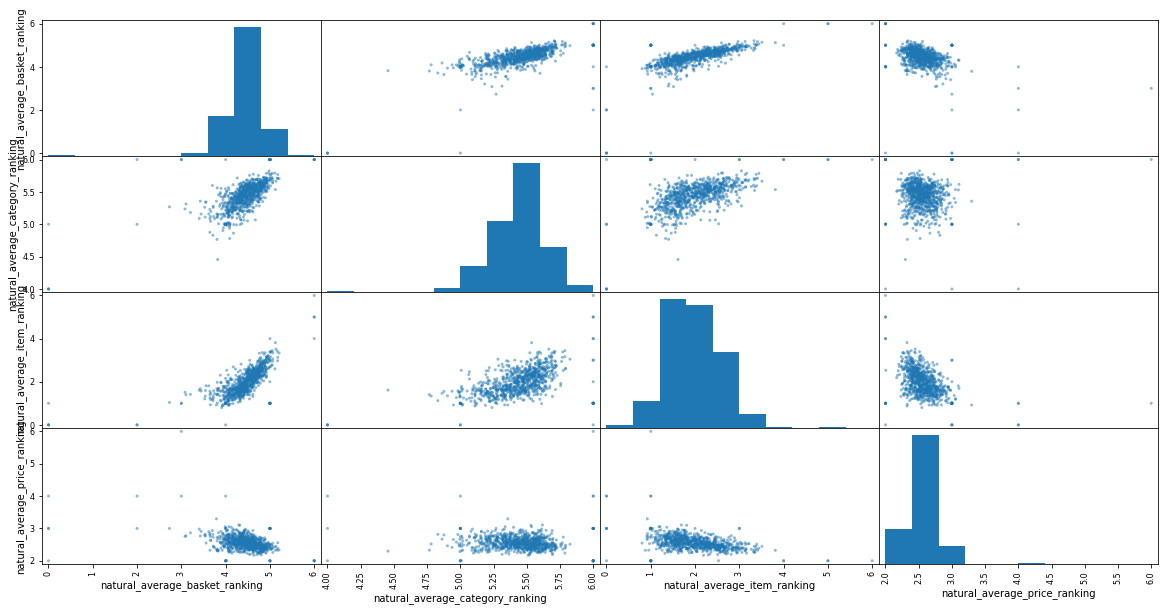

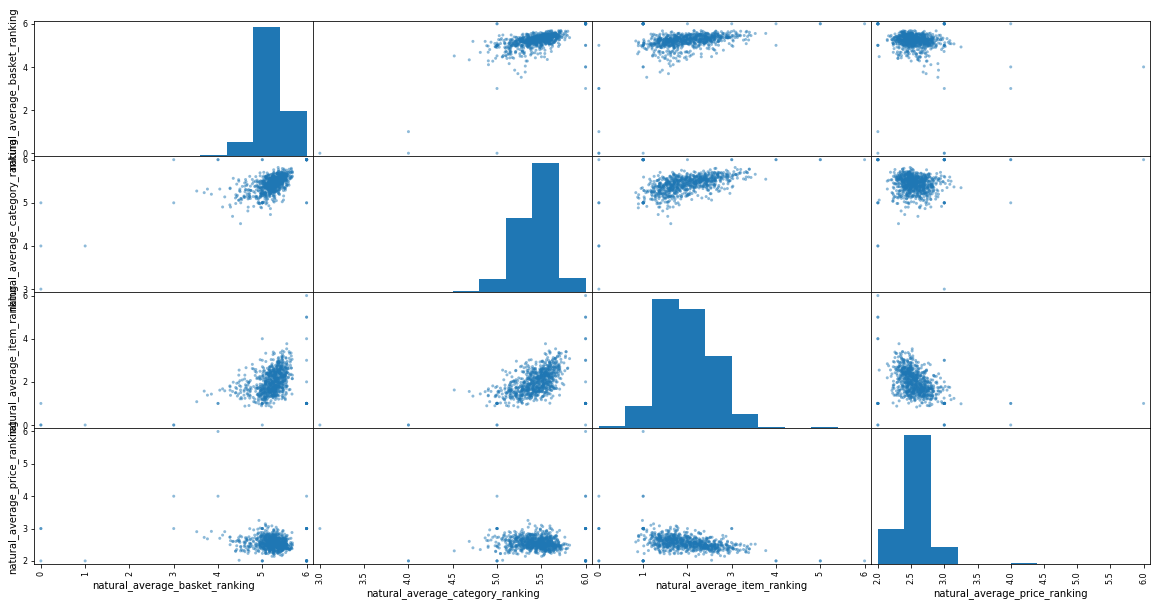

In [5]:
u_df[[NABR, NACR, NAIR, NAPR]] = total_df.merge(s_df[[NABR, NACR, NAIR, NAPR]], on=SHOP, how='left').groupby(USER)[[NABR, NACR, NAIR, NAPR]].mean()
pd.plotting.scatter_matrix(u_df[[NABR, NACR, NAIR, NAPR]], figsize=(20,10))
pure_u_df[[NABR, NACR, NAIR, NAPR]] = pure_df.merge(pure_s_df[[NABR, NACR, NAIR, NAPR]], on=SHOP, how='left').groupby(USER)[[NABR, NACR, NAIR, NAPR]].mean()
pd.plotting.scatter_matrix(pure_u_df[[NABR, NACR, NAIR, NAPR]], figsize=(20,10))

array([[<AxesSubplot:xlabel='frequency_average_basket_ranking', ylabel='frequency_average_basket_ranking'>,
        <AxesSubplot:xlabel='frequency_average_category_ranking', ylabel='frequency_average_basket_ranking'>,
        <AxesSubplot:xlabel='frequency_average_item_ranking', ylabel='frequency_average_basket_ranking'>,
        <AxesSubplot:xlabel='frequency_average_price_ranking', ylabel='frequency_average_basket_ranking'>],
       [<AxesSubplot:xlabel='frequency_average_basket_ranking', ylabel='frequency_average_category_ranking'>,
        <AxesSubplot:xlabel='frequency_average_category_ranking', ylabel='frequency_average_category_ranking'>,
        <AxesSubplot:xlabel='frequency_average_item_ranking', ylabel='frequency_average_category_ranking'>,
        <AxesSubplot:xlabel='frequency_average_price_ranking', ylabel='frequency_average_category_ranking'>],
       [<AxesSubplot:xlabel='frequency_average_basket_ranking', ylabel='frequency_average_item_ranking'>,
        <AxesSubplot:x

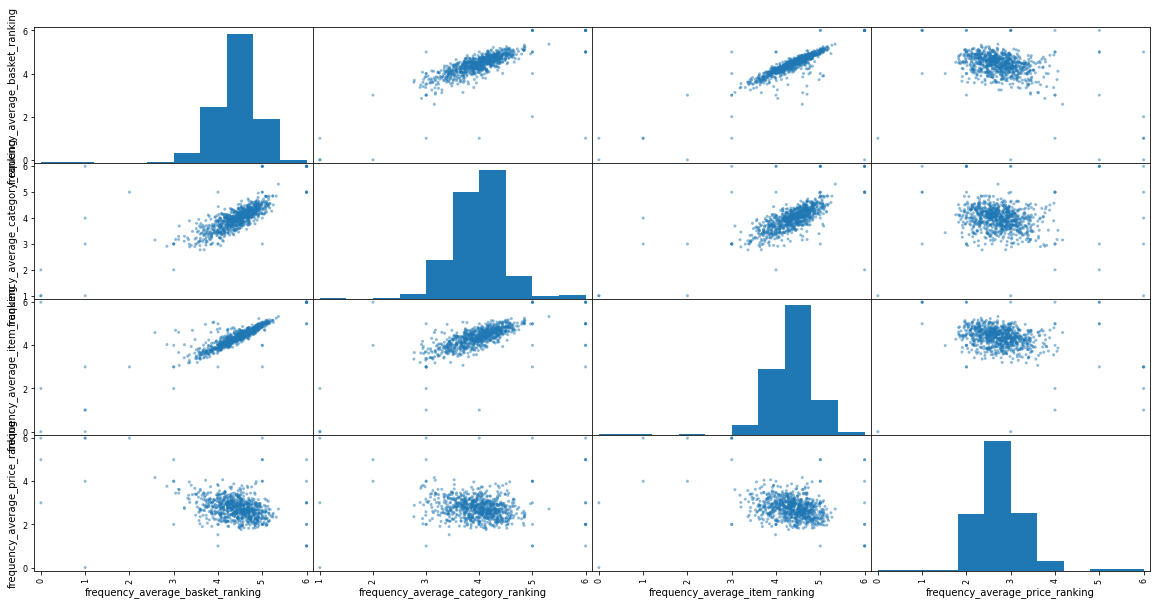

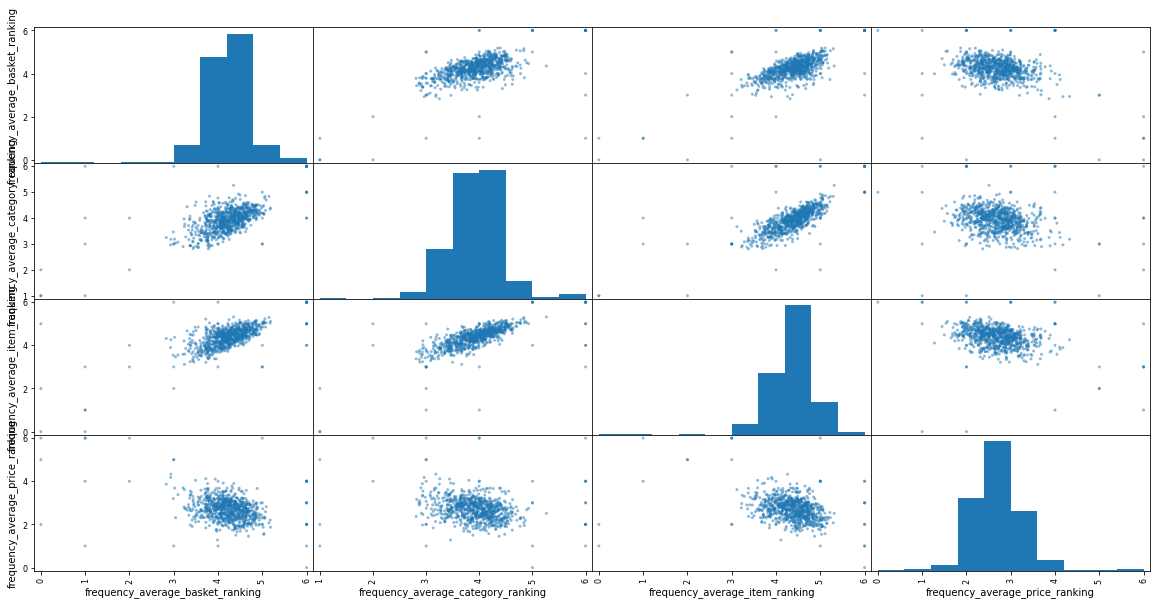

In [6]:
u_df[[FABR, FACR, FAIR, FAPR]] = total_df.merge(s_df[[FABR, FACR, FAIR, FAPR]], on=SHOP, how='left').groupby(USER)[[FABR, FACR, FAIR, FAPR]].mean()
pd.plotting.scatter_matrix(u_df[[FABR, FACR, FAIR, FAPR]], figsize=(20,10))
pure_u_df[[FABR, FACR, FAIR, FAPR]] = pure_df.merge(pure_s_df[[FABR, FACR, FAIR, FAPR]], on=SHOP, how='left').groupby(USER)[[FABR, FACR, FAIR, FAPR]].mean()
pd.plotting.scatter_matrix(pure_u_df[[FABR, FACR, FAIR, FAPR]], figsize=(20,10))

array([[<AxesSubplot:xlabel='user_id', ylabel='user_id'>,
        <AxesSubplot:xlabel='item_count', ylabel='user_id'>,
        <AxesSubplot:xlabel='item_dist_count', ylabel='user_id'>,
        <AxesSubplot:xlabel='max_items_per_b', ylabel='user_id'>,
        <AxesSubplot:xlabel='shop_entropy', ylabel='user_id'>,
        <AxesSubplot:xlabel='category_entropy', ylabel='user_id'>,
        <AxesSubplot:xlabel='item_entropy', ylabel='user_id'>,
        <AxesSubplot:xlabel='price_entropy', ylabel='user_id'>,
        <AxesSubplot:xlabel='max_item_dist_per_b', ylabel='user_id'>,
        <AxesSubplot:xlabel='total_price', ylabel='user_id'>,
        <AxesSubplot:xlabel='basket_count', ylabel='user_id'>,
        <AxesSubplot:xlabel='category_count', ylabel='user_id'>,
        <AxesSubplot:xlabel='shop_count', ylabel='user_id'>,
        <AxesSubplot:xlabel='avg_items_per_basket', ylabel='user_id'>,
        <AxesSubplot:xlabel='avg_baskets_per_d', ylabel='user_id'>,
        <AxesSubplot:xlabel='nat

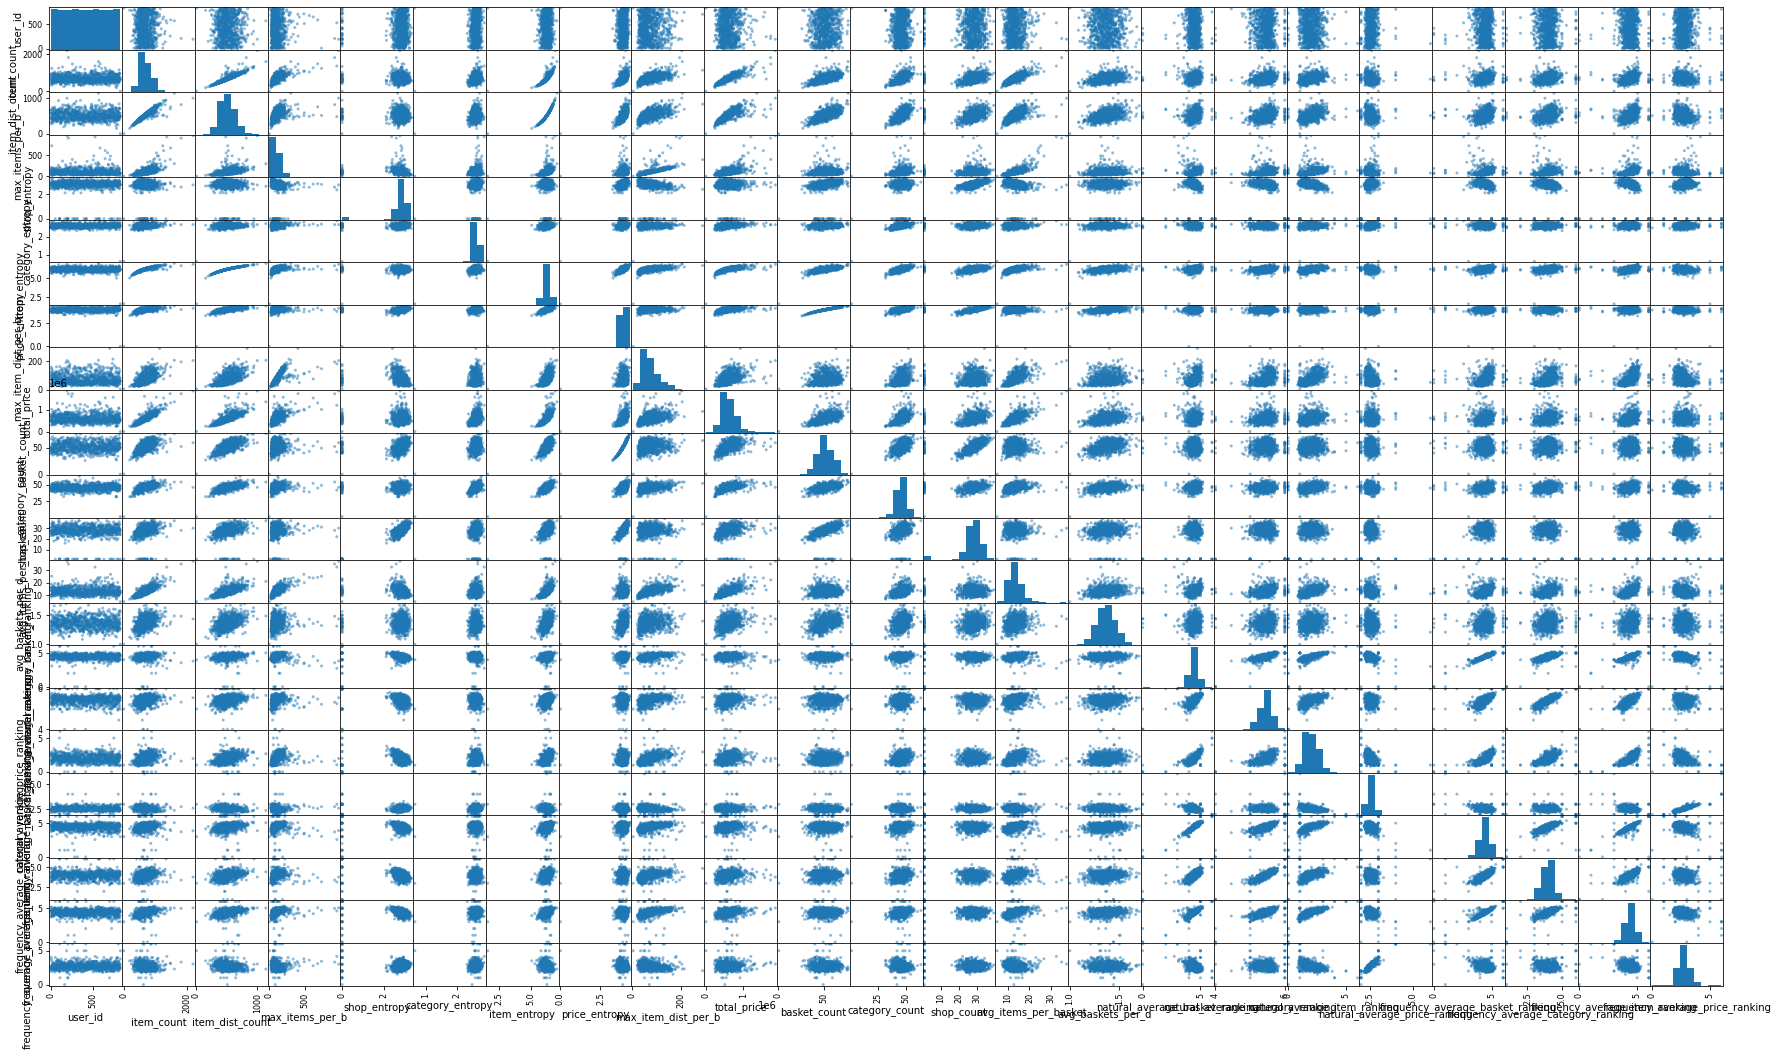

In [7]:
pd.plotting.scatter_matrix(u_df, figsize=(30,18))

### Drop useless columns

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0.5, 0, 'item_count'),
  Text(1.5, 0, 'item_dist_count'),
  Text(2.5, 0, 'max_items_per_b'),
  Text(3.5, 0, 'shop_entropy'),
  Text(4.5, 0, 'category_entropy'),
  Text(5.5, 0, 'item_entropy'),
  Text(6.5, 0, 'price_entropy'),
  Text(7.5, 0, 'max_item_dist_per_b'),
  Text(8.5, 0, 'total_price'),
  Text(9.5, 0, 'basket_count'),
  Text(10.5, 0, 'category_count'),
  Text(11.5, 0, 'shop_count'),
  Text(12.5, 0, 'avg_items_per_basket'),
  Text(13.5, 0, 'avg_baskets_per_d'),
  Text(14.5, 0, 'natural_average_basket_ranking'),
  Text(15.5, 0, 'natural_average_category_ranking'),
  Text(16.5, 0, 'natural_average_item_ranking'),
  Text(17.5, 0, 'natural_average_price_ranking'),
  Text(18.5, 0, 'frequency_average_basket_ranking'),
  Text(19.5, 0, 'frequency_average_category_ranking'),
  Text(20.5, 0, 'frequency_average_item_ranking'),
  Text(2

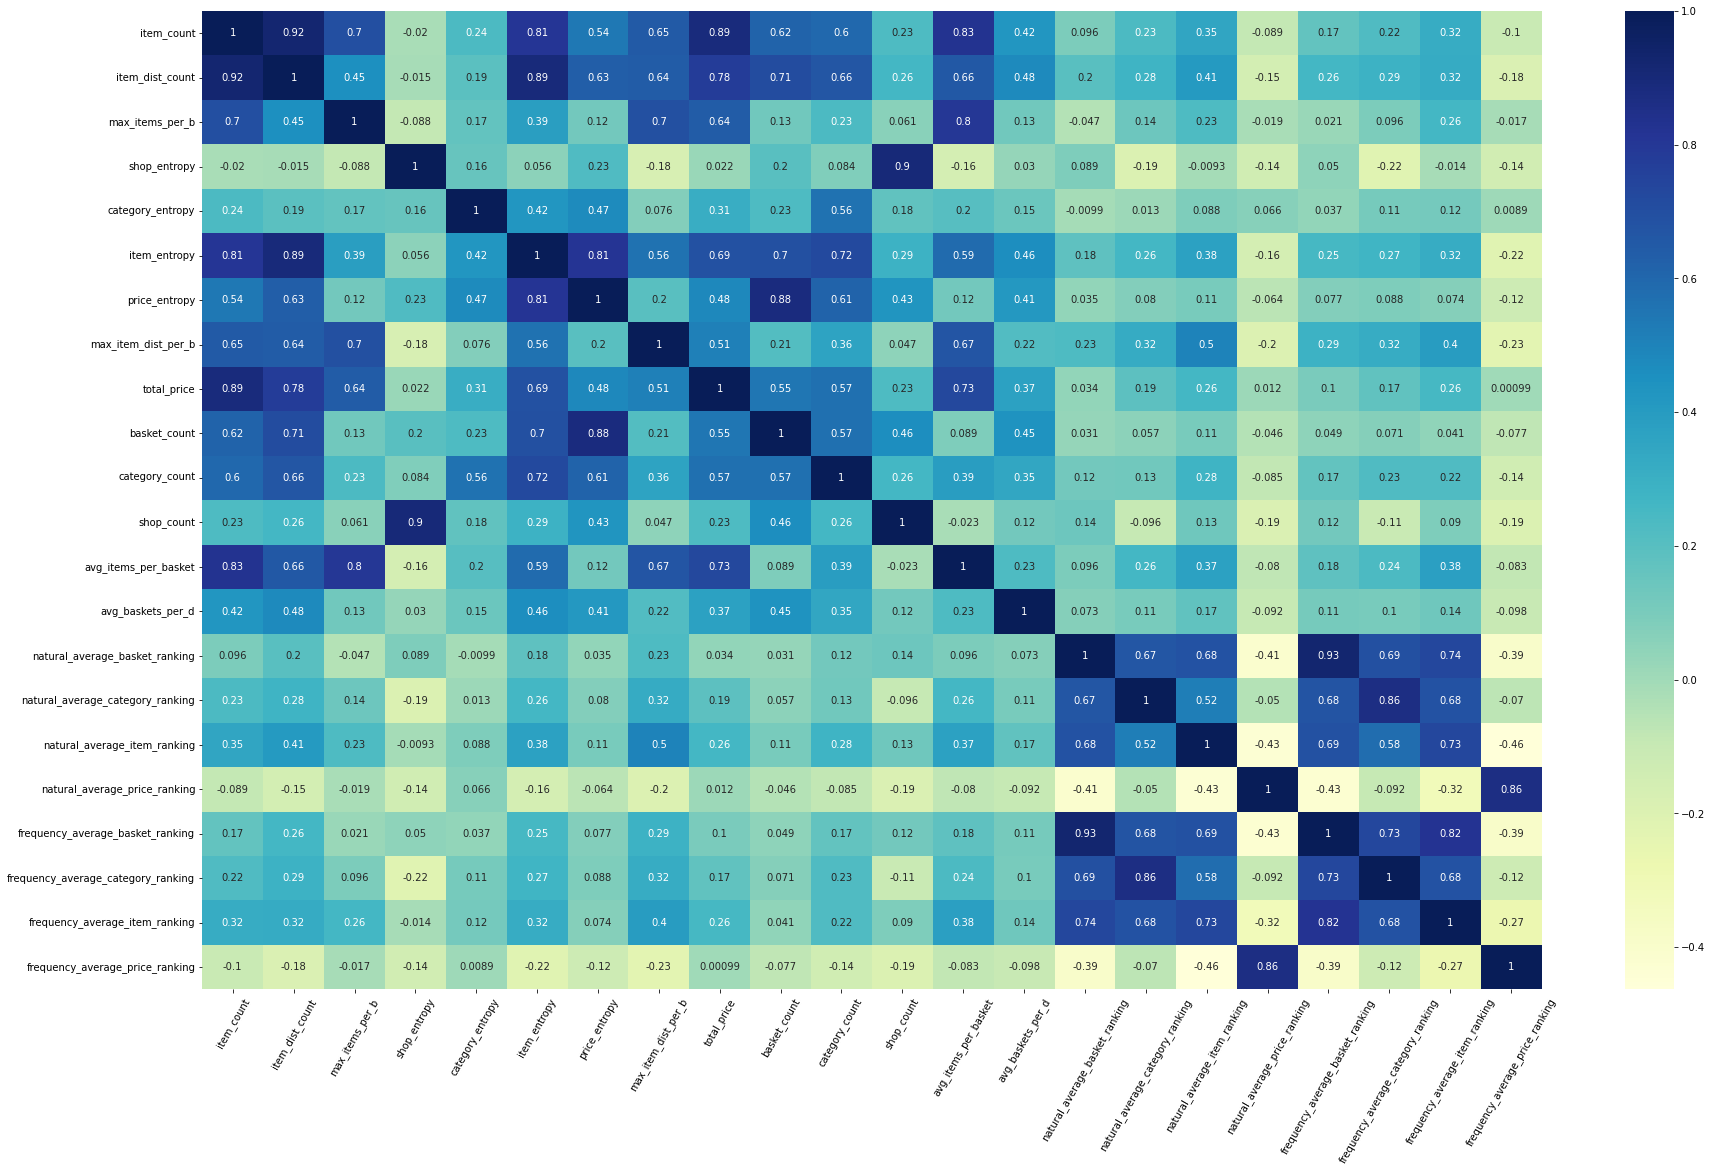

In [8]:
# Pearson correlation of columns describing users
fig, axes = plt.subplots(1, 1, figsize=(30,18))
corr_matrix = u_df.set_index(USER).corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", ax=axes)
plt.xticks(rotation=60)

In [28]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.87)]
clustering_df = u_df.drop(u_df[to_drop], axis=1)
clustering_df = clustering_df.drop(USER, axis=1)
clustering_df

,item_count,max_items_per_b,shop_entropy,category_entropy,price_entropy,max_item_dist_per_b,category_count,avg_items_per_basket,avg_baskets_per_d,natural_average_basket_ranking,natural_average_category_ranking,natural_average_item_ranking,natural_average_price_ranking,frequency_average_category_ranking,frequency_average_item_ranking,frequency_average_price_ranking
user_id,,,,,,,,,,,,,,,,
1,709,141,2.751283,2.547201,3.806662,123,48,15.755556,1.250000,4.613223,5.593388,2.662810,2.325620,4.343802,4.676033,2.195041
2,903,158,2.951922,2.499756,4.168650,104,45,13.681818,1.404255,4.560455,5.352774,2.315789,2.517781,3.715505,4.374111,2.638691
3,397,50,2.893171,2.558895,3.688879,43,41,9.925000,1.290323,3.990964,5.337349,1.207831,3.054217,3.171687,3.728916,4.045181
4,932,214,2.456911,2.490232,3.891820,157,41,19.020408,1.400000,4.787962,5.690834,2.785226,2.500684,4.845417,5.166895,2.341997
5,824,94,2.474509,2.522736,3.912023,82,44,16.480000,1.515152,5.111446,5.790663,2.594880,2.423193,4.858434,5.155120,2.450301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,783,78,2.835483,2.671028,4.043051,66,49,13.736842,1.583333,4.641935,5.445161,2.288710,2.427419,4.069355,4.685484,2.900000
821,646,77,2.955775,2.507064,3.871201,62,44,13.458333,1.371429,4.488189,5.525591,2.009843,2.452756,4.039370,4.419291,2.549213
822,692,83,2.746717,2.591335,4.025352,80,48,12.357143,1.555556,4.665455,5.556364,2.492727,2.389091,4.380000,4.467273,2.381818


## Clustering

In [29]:
clustering_df_array = StandardScaler().fit_transform(clustering_df)

In [30]:
clustering_scores = pd.DataFrame(columns = ['silhouette', 'SSE'], dtype=float)

def store_clustering_scores(points, labels, algorithm_name):
    SSE = 0
    grouped = pd.DataFrame(points).groupby(pd.Series(labels))
    for i, group in grouped:
        center = group.mean(axis=0)
        SSE += np.sum((group - center) * (group - center)).sum()
    clustering_scores.loc[algorithm_name, 'SSE'] = SSE
    clustering_scores.loc[algorithm_name, 'silhouette'] = silhouette_score(points, labels)

In [31]:
sse_list = []

for k in range(2, MAX_K):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100, random_state=1)
    kmeans.fit(clustering_df_array)
    sse = kmeans.inertia_
    sse_list.append(sse)

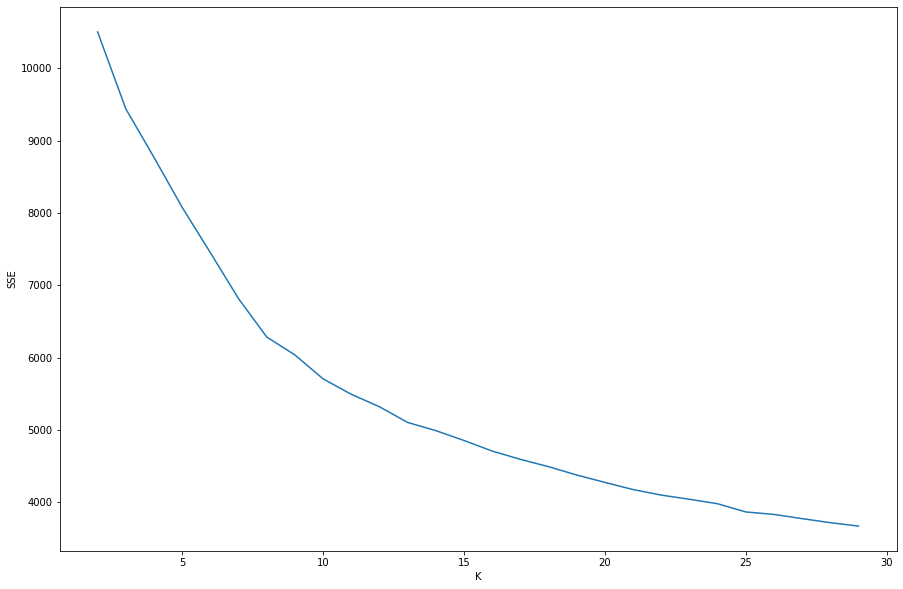

In [32]:
plt.figure(figsize=(15, 10))
plt.plot(range(2, MAX_K), sse_list)
plt.ylabel('SSE')
plt.xlabel('K')
plt.tick_params(axis='both', which='major')
plt.show()

In [33]:
def reoder_labels(labels, centers):
    # Rename clusters labels by cluster size
    renamed_labels = pd.Series(labels.astype(str))
    cluster_sizes = renamed_labels.value_counts()

    def to_new_label(old_label):
        return cluster_sizes.index.get_loc(old_label)

    for i in renamed_labels.index:
        renamed_labels[i] = to_new_label(renamed_labels[i])

    # Re-order the centers
    centers_copy = pd.DataFrame(centers)  # in case a np array was passed
    renamed_centers = np.zeros_like(centers)
    for i, center in centers_copy.iterrows():
        renamed_centers[to_new_label(str(i))] = center

    return renamed_labels, renamed_centers

In [34]:
def plot_clusters(labels, centers, user_df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(labels.astype('str').sort_values(), bins=10, ax=ax1)
    items_per_cluster = labels.value_counts()

    for i, center in enumerate(centers):
        if items_per_cluster.loc[i] > np.sqrt(items_per_cluster.nlargest(1).values):
            ax2.plot(center, range(len(user_df.columns)), marker='o', label='Cluster %s' % i)
    # ax2.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_yticks(range(len(user_df.columns)))
    ax2.set_yticklabels(user_df.columns)
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    plt.legend()
    plt.tight_layout()
    plt.show()

<Figure size 720x360 with 0 Axes>

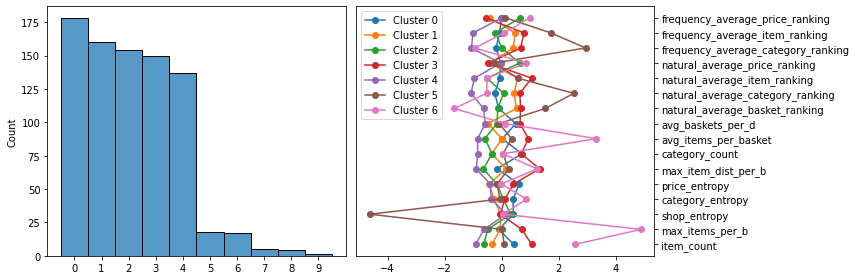

In [37]:
kmeans = KMeans(n_clusters=10, n_init=10, max_iter=100, random_state=1)
kmeans.fit(clustering_df_array)
store_clustering_scores(clustering_df_array, kmeans.labels_, 'kmeans')
kmeans_labels, kmeans_centers = reoder_labels(kmeans.labels_, kmeans.cluster_centers_)
plt.figure(figsize=(10, 5))
plot_clusters(kmeans_labels, kmeans_centers, clustering_df)
plt.show()

In [55]:
colors = cm.rainbow(np.linspace(0, 1, 7))

/tmp/ipykernel_20758/1013402787.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  scatter = ax1.scatter(u_df[mask][IDCNT], u_df[mask][ABXVD], c=kmeans_labels[mask])
/tmp/ipykernel_20758/1013402787.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  scatter = ax2.scatter(u_df[mask][NABR], u_df[mask][NAIR], c=kmeans_labels[mask])
/tmp/ipykernel_20758/1013402787.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  scatter = ax3.scatter(u_df[mask][NABR], u_df[mask][NAPR], c=kmeans_labels[mask])


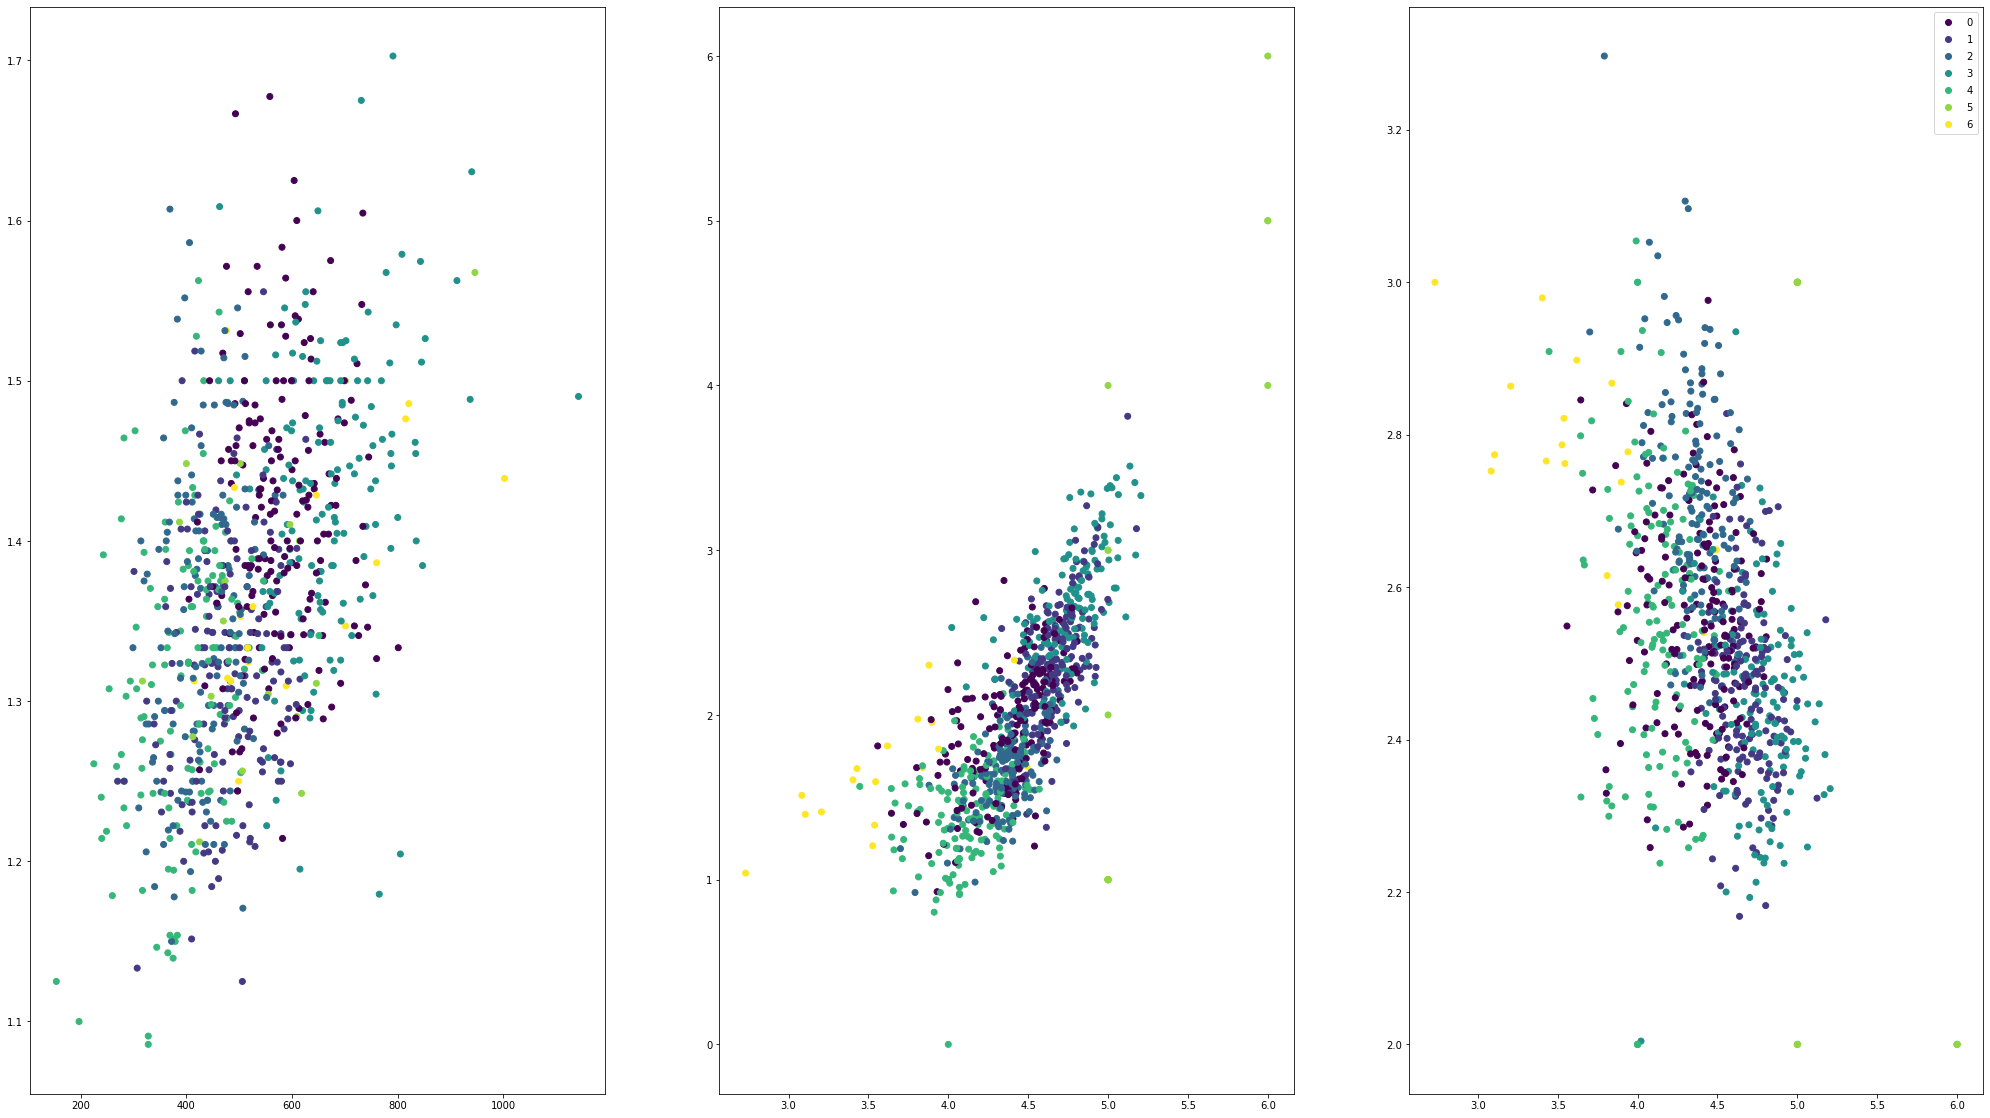

In [57]:
# mask to remove points in outliers clusters
mask = (kmeans_labels != 8) & (kmeans_labels != 9) & (kmeans_labels != 7)
mask.index = range(1, len(mask)+1)
kmeans_labels.index = range(1, len(kmeans_labels)+1)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(35,20))

scatter = ax1.scatter(u_df[mask][IDCNT], u_df[mask][ABXVD], c=kmeans_labels[mask])

scatter = ax2.scatter(u_df[mask][NABR], u_df[mask][NAIR], c=kmeans_labels[mask])

scatter = ax3.scatter(u_df[mask][NABR], u_df[mask][NAPR], c=kmeans_labels[mask])

plt.legend(*scatter.legend_elements(), bbox_to_anchor=(1, 1))